In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## read data

In [3]:
data = pd.read_csv("../Dataset/songs_normalize.csv")
data.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
ind = data.columns.get_loc("explicit")
data.values[:, ind]

array([False, False, False, ..., False, False, False], dtype=object)

In [5]:
data['explicit'].value_counts()

False    1449
True      551
Name: explicit, dtype: int64

In [6]:
data['explicit'].dtypes

dtype('bool')

## label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit([True, False])
data['explicit'] = le.fit_transform(data.values[:, ind])

print(data['explicit'].values)
print(data['explicit'].value_counts())

[0 0 0 ... 0 0 0]
0    1449
1     551
Name: explicit, dtype: int64


In [8]:
data.corr()['explicit']

duration_ms         0.123595
explicit            1.000000
year                0.078477
popularity          0.046605
danceability        0.248845
energy             -0.162462
key                 0.003320
loudness           -0.089829
mode                0.049576
speechiness         0.417343
acousticness       -0.033523
instrumentalness   -0.082522
liveness            0.008884
valence            -0.045455
tempo               0.013221
Name: explicit, dtype: float64

## feature selection

In [9]:
def corr_selection(threshold):
    selected_features = []

    for index, corr in enumerate(data.corr()['explicit']):
        if abs(corr) >= threshold:
            selected_features.append(data.columns[index+2])
            
    return selected_features

In [10]:
selected_features = corr_selection(0.1)
print("selected features:", selected_features)

selected features: ['duration_ms', 'explicit', 'danceability', 'energy', 'speechiness']


## splitting x and y

In [11]:
x = data[selected_features].values
y = data[['explicit']].values

## k-fold cross validation

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

kf = KFold(n_splits=10, random_state=1, shuffle=True)
    
def cross_validation(model, x, y):
    print(model)
    scores = cross_val_score(model, x, y, cv=kf)
    print('scores:', scores)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1600, 5) (1600, 1)
Test set: (400, 5) (400, 1)


## KNN(n=20)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    model = KNeighborsClassifier(n_neighbors = n)
    cross_validation(model, x, y)
    neigh = model.fit(x_train,y_train)
    y_=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_)
 
    std_acc[n-1]=np.std(y_==y_test)/np.sqrt(y_.shape[0])

mean_acc

KNeighborsClassifier(n_neighbors=1)
scores: [0.615 0.62  0.59  0.585 0.58  0.55  0.67  0.62  0.69  0.61 ]
Accuracy: 0.613 (0.040)
KNeighborsClassifier(n_neighbors=2)
scores: [0.735 0.725 0.69  0.635 0.675 0.655 0.73  0.65  0.75  0.68 ]
Accuracy: 0.693 (0.038)
KNeighborsClassifier(n_neighbors=3)
scores: [0.685 0.665 0.695 0.64  0.68  0.575 0.68  0.645 0.725 0.655]
Accuracy: 0.665 (0.038)
KNeighborsClassifier(n_neighbors=4)
scores: [0.725 0.745 0.685 0.66  0.685 0.645 0.745 0.665 0.745 0.695]
Accuracy: 0.700 (0.036)
KNeighborsClassifier()
scores: [0.69  0.7   0.665 0.66  0.68  0.605 0.7   0.655 0.72  0.675]
Accuracy: 0.675 (0.030)
KNeighborsClassifier(n_neighbors=6)
scores: [0.725 0.745 0.695 0.67  0.68  0.675 0.73  0.685 0.745 0.7  ]
Accuracy: 0.705 (0.027)
KNeighborsClassifier(n_neighbors=7)
scores: [0.68  0.715 0.68  0.655 0.67  0.63  0.705 0.675 0.715 0.675]
Accuracy: 0.680 (0.025)
KNeighborsClassifier(n_neighbors=8)
scores: [0.72  0.76  0.715 0.665 0.715 0.65  0.73  0.7   0.74  0.7 

array([0.6   , 0.6925, 0.63  , 0.7075, 0.655 , 0.705 , 0.6675, 0.7   ,
       0.6775, 0.7025, 0.695 , 0.705 , 0.7   , 0.7025, 0.7   , 0.7075,
       0.705 , 0.72  , 0.7075])

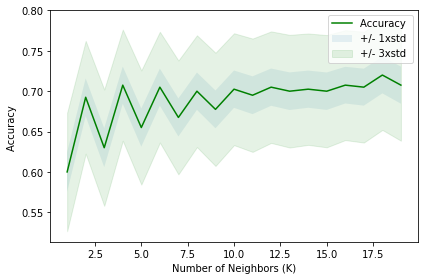

In [82]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## confusion matrix

In [83]:
from sklearn import metrics

def conf_matrix(model, y_test, y_pred):
    actual = np.random.binomial(1,.9,size = 1000)
    predicted = np.random.binomial(1,.9,size = 1000)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot()
    plt.show()

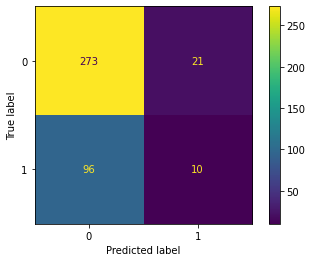

In [84]:
conf_matrix(model, y_test, y_)

## SVM

In [117]:
from sklearn import svm

svm_model = svm.SVC(kernel='sigmoid')
svm_model.fit(x_train, y_train) 

SVC(kernel='sigmoid')

In [118]:
y_ = svm_model.predict(x_test)

## evaluations

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_, labels=[0, 1]))
print(classification_report(y_test, y_))

[[234  60]
 [ 79  27]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       294
           1       0.31      0.25      0.28       106

    accuracy                           0.65       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.63      0.65      0.64       400



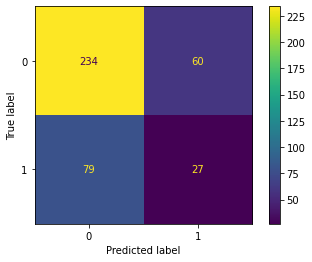

In [120]:
conf_matrix(svm_model, y_test, y_)

In [124]:
from sklearn.metrics import f1_score, jaccard_score

print('f1-score:', f1_score(y_test, y_, average='weighted') )
print('jaccard score:', jaccard_score(y_, y_test, pos_label=0))

0.6408337103396471
jaccard score: 0.6273458445040214


# Decision Tree

zeros:  1161
ones:  439
Gini : 0.3981867187500001
Accuracy: 1.0


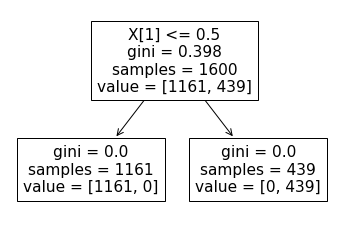

In [24]:
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

predicted_value = model.predict(x_test)

tree.plot_tree(model)

zeroes = 0
ones = 0
for i in range(0, len(y_train)):
	if y_train[i] == 0:
		zeroes += 1
	else:
		ones += 1

print('zeros: ', zeroes)
print('ones: ', ones)

val = 1 - ((zeroes/1600)*(zeroes/1600) + (ones/1600)*(ones/1600))
print("Gini :", val)

y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

